In [93]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [94]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/MNC_Salaries.csv')

In [95]:
dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
Height      457 non-null object
Weight      457 non-null int64
College     373 non-null object
Salary      446 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.2+ KB


In [97]:
# Firstly, we should have a look whether the data is completed or not.
# Because the missing value will have an adverse impact on the building of regression model.

null_values_col = dataset.isnull().sum()
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head()

,variable,number of missing
0,College,84
1,Salary,11


In [98]:
dataset.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [99]:
# using median value of each column to fill the N/A values, because it will not be influened by outliers.

def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

fillWithMedian(dataset)

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
Height      457 non-null object
Weight      457 non-null int64
College     373 non-null object
Salary      457 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.2+ KB


In [101]:
# replacing na values in college with No college 
dataset["College"].fillna("No College", inplace = True) 

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
Height      457 non-null object
Weight      457 non-null int64
College     457 non-null object
Salary      457 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.2+ KB


In [103]:
dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,2839073.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,No College,5000000.0


In [104]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

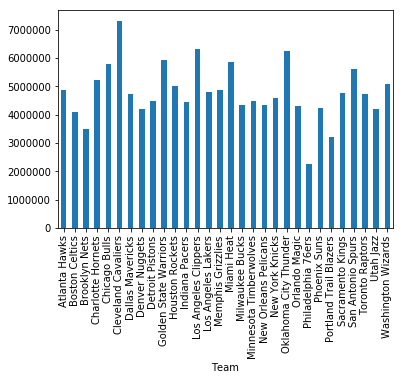

In [105]:
dataset.groupby('Team').Salary.mean().plot(kind='bar')

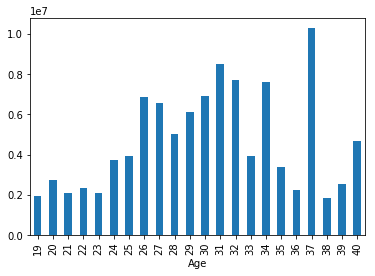

In [106]:
dataset.groupby('Age').Salary.mean().plot(kind='bar')

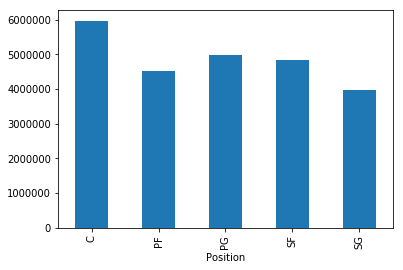

In [107]:
dataset.groupby('Position').Salary.mean().plot(kind='bar')

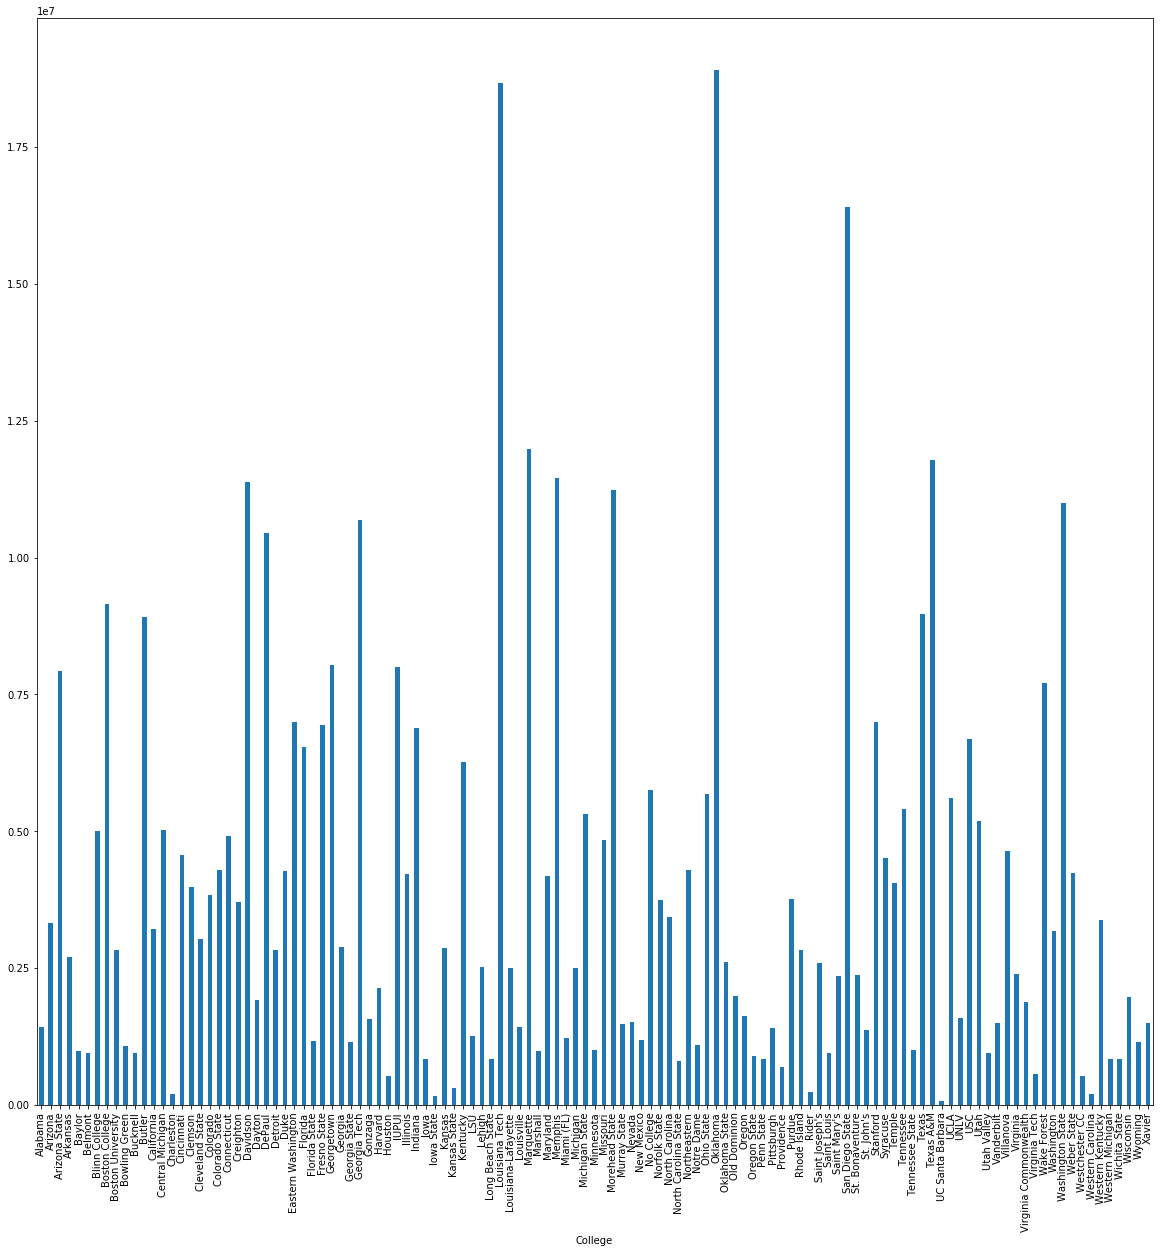

In [108]:
dataset.groupby('College').Salary.mean().plot(kind='bar', figsize = (20,20))

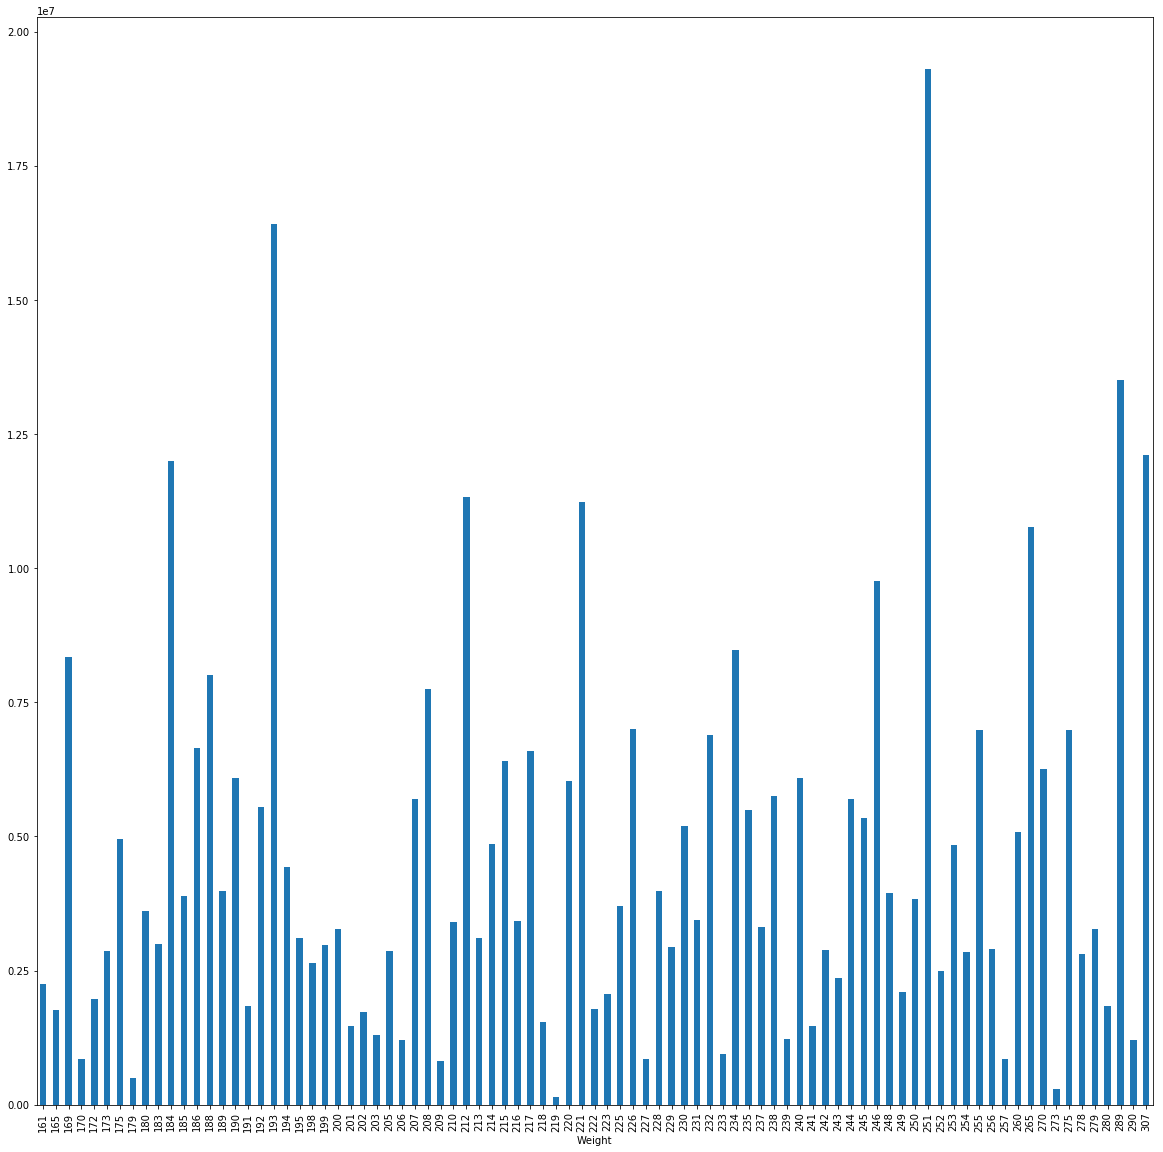

In [109]:
dataset.groupby('Weight').Salary.mean().plot(kind='bar', figsize = (20,20))